In [0]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-29 10:00:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   226MB/s    in 0.3s    

2020-05-29 10:00:32 (226 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:

train_dir = os.path.join('/tmp/cats_and_dogs_filtered/train')
validation_dir = os.path.join('/tmp/cats_and_dogs_filtered/validation')

train_cats = os.path.join('/tmp/cats_and_dogs_filtered/train/cats')
train_dogs = os.path.join('/tmp/cats_and_dogs_filtered/train/dogs')

test_cats = os.path.join('/tmp/cats_and_dogs_filtered/validation/cats')
test_dogs = os.path.join('/tmp/cats_and_dogs_filtered/validation/dogs')

In [0]:

print('Total training cats: '+str(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats'))))
print('Total training dogs: '+str(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs'))))
print('Total validation cats: '+str(len(os.listdir('/tmp/cats_and_dogs_filtered/validation/cats'))))
print('Total validation dogs: '+str(len(os.listdir('/tmp/cats_and_dogs_filtered/validation/dogs'))))

Total training cats: 1000
Total training dogs: 1000
Total validation cats: 500
Total validation dogs: 500


In [0]:
from tensorflow.keras import regularizers

model = keras.models.Sequential([
                                 keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(32, (3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(2,2), 
                                 keras.layers.Conv2D(64, (3,3), activation='relu'), 
                                 keras.layers.MaxPooling2D(2,2),
                                 # Flatten the results to feed into a DNN
                                 keras.layers.Flatten(), 
                                 # 512 neuron hidden layer
                                 keras.layers.Dense(512, activation='relu'), 
                                 # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
                                 keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['acc']
              )

In [0]:
history = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/100
100/100 [==============================] - 21s 209ms/step - loss: 0.5885 - acc: 0.6925 - val_loss: 0.5092 - val_acc: 0.7280
Epoch 2/100
100/100 [==============================] - 19s 192ms/step - loss: 0.5629 - acc: 0.7160 - val_loss: 0.7875 - val_acc: 0.7280
Epoch 3/100
100/100 [==============================] - 19s 188ms/step - loss: 0.5536 - acc: 0.7065 - val_loss: 0.7587 - val_acc: 0.7030
Epoch 4/100
100/100 [==============================] - 19s 190ms/step - loss: 0.5500 - acc: 0.7260 - val_loss: 0.4756 - val_acc: 0.6890
Epoch 5/100
100/100 [==============================] - 19s 187ms/step - loss: 0.5324 - acc: 0.7320 - val_loss: 0.4034 - val_acc: 0.7300
Epoch 6/100
100/100 [==============================] - 19s 187ms/step - loss: 0.5393 - acc: 0.7165 - val_loss: 0.6706 - val_acc: 0.7330
Epoch 7/100
100/100 [==============================] - 19s 190ms/step - loss: 0.5319 - acc: 0.7300 - val_loss: 0.5264 - val_acc: 0.7380
Epoch 8/100
100/100 [===========================

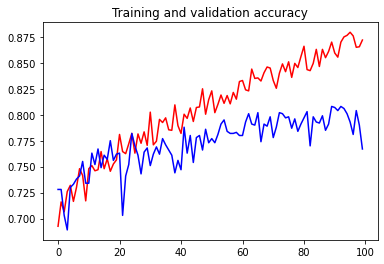

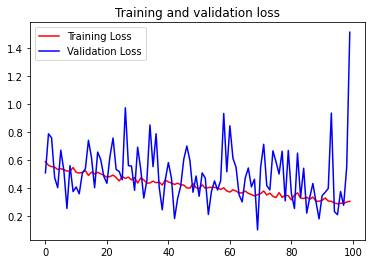

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()